# Regularização

In [139]:
import sklearn as sk
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline

data = pd.read_csv('ex1data3.txt', delimiter=' ', header=None, names=['x', 'f1', 'f2', 'f3', 'f4', 'f5', 'price'])
data.drop('x', axis=1, inplace=True)
data.head()

,f1,f2,f3,f4,f5,price
0,2.104,3,1.214590,1.645454,2.040360,3.999
1,1.600,3,0.804845,1.156956,1.043933,3.299
2,2.400,3,1.526176,1.990969,2.735965,3.690
3,1.416,2,1.017324,1.048135,0.873698,2.320
4,3.000,4,1.352385,2.118710,2.403007,5.399


In [140]:
# Train
train = data.iloc[:30]
xTrain = train.drop('price', axis = 1)
yTrain = train['price']

# Test
test = data.iloc[30:]
xTest = test.drop('price', axis = 1)
yTest = test['price']


In [141]:
from sklearn.linear_model import Ridge


alphas = [0.0, 1.0, 2.0, 3.0, 4.0, 5.0]
ridges = [ Ridge(alpha = alpha, solver = 'lsqr', random_state = 2).fit(xTrain, yTrain) for alpha in alphas ]


## Coeficientes:

In [142]:
coefs = [ ridge.coef_ for ridge in ridges ]
for idx, coef in enumerate(coefs):
    print('Coeficientes com regularização em {}: {}\n'.format(idx, coef))

Coeficientes com regularização em 0: [ 2.05650083  0.12143939 -1.16137913  0.06272863 -0.39110215]

Coeficientes com regularização em 1: [ 1.3391608   0.22506765  0.18015951  0.04805731 -0.24707489]

Coeficientes com regularização em 2: [ 1.16265734  0.23054745  0.24910813  0.05703977 -0.11526088]

Coeficientes com regularização em 3: [ 1.04932735  0.23303931  0.25988061  0.06804293 -0.03117398]

Coeficientes com regularização em 4: [ 0.96594175  0.23441173  0.25770665  0.07853842  0.0254692 ]

Coeficientes com regularização em 5: [ 0.89882204  0.23584201  0.25686     0.08797734  0.06416699]



### Conforme os preditores e os coeficientes acima, temos que as variáveis 'f2', 'f4' e 'f5' são as menos relevantes. 'f1' tem a maior relevância e, em seguida, 'f3' com sua relevância que influência negativamente a predição, dependendo do valor de lâmbda, ou se torna pouco relevante.

In [143]:
# Predicts for each dataset samples: train and test
predictsTrain = [ ridge.predict(xTrain) for ridge in ridges ]
predictsTest = [ ridge.predict(xTest) for ridge in ridges ] 

In [144]:
# Calculate errors
errorsTrain = [ (yTrain.iloc[idx] - yPred)**2 for predicts in predictsTrain for idx, yPred in enumerate(predicts)  ]
errorsTest = [ (yTest.iloc[idx] - yPred)**2 for predicts in predictsTest for idx, yPred in enumerate(predicts)  ]

In [145]:
# Calculate mean squared errors
eqmTrainByAlpha = [ sum(errorsTrain[i*30:(i+1)*30])/30 for i in range(6) ]
eqmTestByAlpha = [ sum(errorsTest[i*17:(i+1)*17])/17 for i in range(6) ]

### Gráfico da relação EQM x lâmbda para os dados de Treino

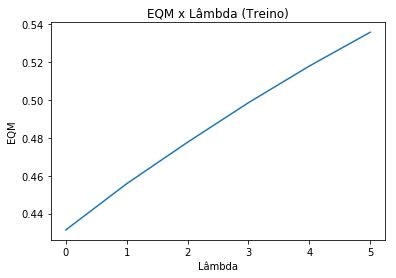

In [146]:
plt.plot(range(6), eqmTrainByAlpha, '-')
plt.xlabel('Lâmbda')
plt.ylabel('EQM')
plt.title('EQM x Lâmbda (Treino)')

In [147]:
eqmTrainByAlpha

[0.43133131025279897,
 0.45572830753894578,
 0.47765354145331035,
 0.4985661552465806,
 0.51791467596594898,
 0.53580547550987956]

### Gráfico da relação EQM x lâmbda para os dados de Treino

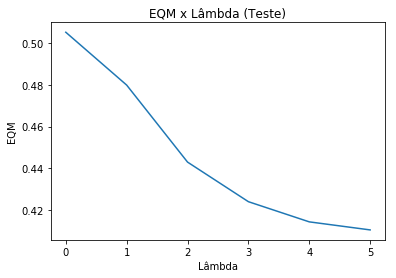

In [148]:
plt.plot(range(6), eqmTestByAlpha, '-')
plt.xlabel('Lâmbda')
plt.ylabel('EQM')
plt.title('EQM x Lâmbda (Teste)')

In [149]:
eqmTestByAlpha

[0.50535896199943098,
 0.47996521204329834,
 0.44294906336770312,
 0.42391932729397092,
 0.41422426186891448,
 0.41035528041906189]

### Para os dados de treino, percebemos um crescimento no EQM conforme lâmbda aumenta, diferente do conjunto de testes. Esse comportamento ocorre pois, com lâmbda = 0, temos a regressão com o modelo linear normal, com ênfase nos preditores que mais refletem na relação linear com y, adaptado ao conjunto de treino. No momento em que lâmbda aumenta, a ideia é o modelo se tornar cada vez mais simples, dado que minimiza a função em custo dos coeficientes, podendo refletir na importância de cada preditor. Assim, a intenção é generalizar o modelo cada vez mais, por isso o aumento de EQM no conjunto de treino. De mesmo modo ocorre com o conjunto de teste, pois ainda com lâmbda = 0, o EQM no conjunto de testes é o mais alto, significando que o modelo estava "adaptado" ao conjunto de treino (overfitting), mas não generalizado suficiente ao conjunto de teste. Assim, ao aumentar lâmbda, com o modelo mais generalizado, EQM de treino aumenta e EQM de testes tende a diminuir. 